In [325]:
import pandas as pd
import numpy as np
import re
import os
import multiprocessing as mp
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from datetime import datetime


In [326]:
data = pd.read_table('./prepr/relevant_new/data686.txt',index_col=False)

In [327]:
data['time'] = data['time'].apply(lambda x: datetime.strptime(x, "%d.%m.%Y %H:%M:%S.%f"))

In [328]:
def todrop(data):
    todrop = []
    for col in [c for c in data.columns if data[c].dtype.name != 'object']:
        if len(data[col].unique())<2:
            todrop.append(col)
            print col, ' : ', len(data[col].unique()), '\n'
    a = data.drop(todrop, axis=1)
        
    return a

data = todrop(data)

GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiBtmTopFlwRatioManRef_ActV  :  1 

SCC._SccRtData.SccRtData.SccRefPrsPmp  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[20]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[21]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[22]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[23]  :  1 

THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj[24]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[20]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[20]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[21]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[22]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[22]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[23]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[23]  :  1 

THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct[24]  :  1 

THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj[24]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[20]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[21]  :  1 

THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef[22]  : 

In [329]:
for i in range(1,6):
    data['PRC.GlobVar.PrcLocRtData.PrcPosMean'+str(i)] = data[['PRC.GlobVar.PrcLocRtData.PrcPosActDs'+str(i),'PRC.GlobVar.PrcLocRtData.PrcPosActOs'+str(i) ]].mean(axis=1)
    data['PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff'+str(i)] = data['PRC.GlobVar.PrcLocRtData.PrcPosActDs'+str(i)] - data['PRC.GlobVar.PrcLocRtData.PrcPosActOs'+str(i) ]
    data['PRC.GlobVar.PrcLocRtData.PrcPosDiff'+str(i)] = data[ 'PRC.GlobVar.PrcLocRtData.Prc'+str(i)+'PosRef'] - data['PRC.GlobVar.PrcLocRtData.PrcPosMean'+str(i)]
    
data['PRC.GlobVar.PrcLocRtData.PrcPosMean'] = data[[x for x in data.columns if x.startswith('PRC.GlobVar.PrcLocRtData.PrcPosMean')]].mean(axis=1)
data['PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff_sum'] = data[[x for x in data.columns if x.startswith('PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff')]].sum(axis=1)
data['PRC.GlobVar.PrcLocRtData.PrcPosDiff_sum'] = data[[x for x in data.columns if x.startswith('PRC.GlobVar.PrcLocRtData.PrcPosDiff')]].sum(axis=1)
    
data.drop(['PRC.GlobVar.PrcLocRtData.PrcPosActDs1',
 'PRC.GlobVar.PrcLocRtData.PrcPosActDs2',
 'PRC.GlobVar.PrcLocRtData.PrcPosActDs3',
 'PRC.GlobVar.PrcLocRtData.PrcPosActDs4',
 'PRC.GlobVar.PrcLocRtData.PrcPosActDs5',
 'PRC.GlobVar.PrcLocRtData.PrcPosActOs1',
 'PRC.GlobVar.PrcLocRtData.PrcPosActOs2',
 'PRC.GlobVar.PrcLocRtData.PrcPosActOs3',
 'PRC.GlobVar.PrcLocRtData.PrcPosActOs4',
 'PRC.GlobVar.PrcLocRtData.PrcPosActOs5',
 'PRC.GlobVar.PrcLocRtData.Prc1PosRef',
 'PRC.GlobVar.PrcLocRtData.Prc2PosRef',
 'PRC.GlobVar.PrcLocRtData.Prc3PosRef',
 'PRC.GlobVar.PrcLocRtData.Prc4PosRef',
 'PRC.GlobVar.PrcLocRtData.Prc5PosRef','GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenBot_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskLenTop_SetV'],axis=1, inplace=True)

In [330]:
for i in range(1,10):
    data['EMC.GlobVar.EmcLocRtData.Mot_PosMean'+str(i)] = data[['EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds['+str(i)+ ']','EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os['+str(i)+ ']']].mean(axis=1)
    data['EMC.GlobVar.EmcLocRtData.Mot_PosDiff'+str(i)] = data['EMC.GlobVar.EmcLocRtData.Car_Pos_Ref['+str(i) + ']'] - data[ 'EMC.GlobVar.EmcLocRtData.Mot_PosMean'+str(i)] 
    data['EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff'+str(i)] = data['EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds['+str(i) + ']'] - data['EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os['+str(i) + ']']

data['EMC.GlobVar.EmcLocRtData.Mot_PosMean'] = data[[x for x in data.columns if x.startswith('EMC.GlobVar.EmcLocRtData.Mot_PosMean')]].mean(axis=1)
data['EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff_sum'] = data[[x for x in data.columns if x.startswith('EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff')]].sum(axis=1)
data['EMC.GlobVar.EmcLocRtData.Mot_PosDiff_sum'] = data[[x for x in data.columns if x.startswith('EMC.GlobVar.EmcLocRtData.Mot_PosDiff')]].sum(axis=1)

    
data.drop(['EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[1]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[2]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[3]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[4]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[5]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[6]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[7]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[8]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Ds[9]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[1]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[2]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[3]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[4]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[5]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[6]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[7]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[8]',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_Act_Os[9]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[1]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[2]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[3]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[4]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[5]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[6]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[7]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[8]',
 'EMC.GlobVar.EmcLocRtData.Car_Pos_Ref[9]'],axis=1, inplace=True)

In [331]:
data['dist_from_plt_mean'] = data[['THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[1]','THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[2]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[3]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[4]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[5]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[6]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[7]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[8]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[9]']].mean(axis=1)

data['dist_from_plt_sum'] = data[['THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[1]','THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[2]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[3]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[4]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[5]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[6]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[7]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[8]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[9]']].sum(axis=1)

data.drop (['THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[1]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[2]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[3]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[4]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[5]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[6]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[7]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[8]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Act[9]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[1]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[2]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[3]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[4]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[5]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[6]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[7]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[8]',
 'THL.ResGlobVar.ThlLocRtData.Mot_Pos_Ref[9]'], axis=1, inplace=True)

In [332]:
flow_cols = [x for x in data.columns if 'Flw' in x and ('WatAbs' not in x) and ('Ratio' not in x)]
data[flow_cols] = data[flow_cols].apply(lambda x: x/100)

In [333]:
data[ 'SCC._SccRtData.SccRtData.SpecFlw_Bot_SUM'] = data[['SCC._SccRtData.SccRtData.SpecFlwAct_Bot[1]',
'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[2]',
'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[3]',
'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[4]']].sum(axis=1)

data[ 'SCC._SccRtData.SccRtData.SpecFlw_TOP_SUM'] = data[[ 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[1]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[2]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[3]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[4]']].sum(axis=1)
    
data[ 'SCC._SccRtData.SccRtData.SpecFlw_Bot_SUM_task'] = data[['SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[1]',
 'SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[2]',
 'SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[3]',
 'SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[4]']].sum(axis=1)

data[ 'SCC._SccRtData.SccRtData.SpecFlw_TOP_SUM_task'] = data[[ 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[1]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[2]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[3]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[4]']].sum(axis=1)    

data.drop(['SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[1]',
 'SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[2]',
 'SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[3]',
 'SCC.GlobVar.SccCtrlInput_Bot.SpecFlwRef[4]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[1]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[2]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[3]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Bot[4]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[1]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[2]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[3]',
 'SCC.GlobVar.SccCtrlInput_Top.SpecFlwRef[4]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[1]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[2]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[3]',
 'SCC._SccRtData.SccRtData.SpecFlwAct_Top[4]'],axis=1, inplace=True)



In [334]:
data['BHC_cen_act_degree_sum'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj')]].sum(axis = 1)

data['BHC_cen_flow_sum_act'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Cen.SpecFlwAct')]].sum(axis=1)


data['BHC_cen_flow_act_mean'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Cen.SpecFlwAct')]].mean(axis = 1)

data.drop([x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Cen.SpecFlwAct') or  
           x.startswith('BHC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj')], axis = 1, inplace=True)


data['BHC_out_act_degree_mean'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj')]].mean(axis=1)  

data['BHC_out_act_mean'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Out.SpecFlwAct')]].mean(axis=1)             

data['BHC_out_act_degree_sum'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj')]].sum(axis=1) 

data['BHC_out_act_sum'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Out.SpecFlwAct')]].sum(axis=1) 


data.drop([x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlOutput_Out.SpecFlwAct') 
           or x.startswith('BHC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj')], axis=1, inplace=True)

data['THC_cen_act_degree_sum'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj')]].sum(axis=1)

data['THC_cen_flow_sum_act'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Cen.SpecFlwAct')]].sum(axis=1)


data['THC_cen_flow_mean_act'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Cen.SpecFlwAct')]].mean(axis=1)

data.drop([x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Cen.SpecFlwAct') or
         x.startswith('THC.GlobVar.AccCtrlOutput_Cen.FlwCtrlAdj') ], axis=1, inplace=True)


data['THC_out_degree_sum_act'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj')]].sum(axis=1)

[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct')]
data['THC_out_flow_sum_act'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct')]].sum(axis=1)

data['THC_out_flow_mean_act'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct')]].mean(axis=1)


data.drop([x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlOutput_Out.SpecFlwAct') or
          x.startswith('THC.GlobVar.AccCtrlOutput_Out.FlwCtrlAdj')], axis=1, inplace=True)

In [335]:
data['BHC_cen_degree_sum_task'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlInput_Cen.FlwCtrlAdjFbk')]].sum(axis=1)

data['BHC_out_degree_sum_task'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk')]].sum(axis=1)

data['BHC_flow_cen_sum_task'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlInput_Cen.SpecFlwRef')]].sum(axis=1)
data['BHC_flow_cen_mean_task'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlInput_Cen.SpecFlwRef')]].mean(axis=1)


data['BHC_flow__out_sum_task'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlInput_Out.SpecFlwRef')]].sum(axis=1)

data['BHC_flow__out_mean_task'] = data[[x for x in data.columns if x.startswith('BHC.GlobVar.AccCtrlInput_Out.SpecFlwRef')]].mean(axis=1)

data['THC_degree_cen_sum_task'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Cen.FlwCtrlAdjFbk')]].sum(axis=1)

data['THC_flow_cen_sum_task'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef')]].sum(axis=1)

data['THC_flow_cen_mean_task'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef')]].mean(axis=1)


data['THC_out_degree_sum_task'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk')]].sum(axis=1) 


data['THC_out_flow_sum_task'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Out.SpecFlwRef')]].sum(axis=1)

data['THC_out_flow_mean_task'] = data[[x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Out.SpecFlwRef')]].mean(axis=1)


data.drop([x for x in data.columns if x.startswith('THC.GlobVar.AccCtrlInput_Out.SpecFlwRef') or
           x.startswith('THC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk') or x.startswith('THC.GlobVar.AccCtrlInput_Cen.SpecFlwRef') or
           x.startswith('THC.GlobVar.AccCtrlInput_Cen.FlwCtrlAdjFbk') or
           x.startswith('BHC.GlobVar.AccCtrlInput_Out.SpecFlwRef')
          or  x.startswith('BHC.GlobVar.AccCtrlInput_Cen.FlwCtrlAdjFbk') or  x.startswith('BHC.GlobVar.AccCtrlInput_Out.FlwCtrlAdjFbk')
          or x.startswith('BHC.GlobVar.AccCtrlInput_Cen.SpecFlwRef')], axis=1, inplace = True)

In [336]:
data1_temp = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[1]']>=139.906)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[1]']<=205.83)]
data2_temp = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[2]']>=139.906)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=205.83)]

In [337]:
data1 = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[1]']>=148.83)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=185.83)]
data2 = data.loc[(data['GSF.GlobVar.AccTrkMap.PosHeadCol[2]']>=148.83)&(data['GFC.GlobVar.AccTrkMap.PosTailCol[2]']<=185.83)]

In [338]:
data1.loc[data1['GFC.GlobVar.AccTrkMap.PltSpdCol[2]']<0]['GSF.GlobVar.AccTrkMap.PosHeadCol[1]'].max()

240.22099999999998

In [264]:
print len(data1)
print len(data2)
print len(data)
print len(data1)+len(data2)

71594
40105
195489
111699


In [265]:
data1_temp['pltid'] = data1_temp['id1']
data2_temp['pltid'] = data2_temp['id2']

data1['pltid'] = data1['id1']
data2['pltid'] = data2['id2']

In [266]:
droplist = ['GFC.GlobVar.AccPyr.Pyr[5].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[6].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[7].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[8].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[14].Tmp',
 'GfcPdiIdSeq1_Date_ActV',
 'GfcPdiIdSeq1_Number_ActV',
 'GfcPdiIdSeq2_Date_ActV',
 'GfcPdiIdSeq2_Number_ActV',
'GFC.GlobVar.AccTrkMap.PosTailCol[1]',
 'GFC.GlobVar.AccTrkMap.PltSpdCol[1]',
 'GFC.GlobVar.AccTrkMap.PltSpdCol[2]',
 'GFC.GlobVar.AccTrkMap.PosTailCol[2]',
            
        'GSF.GlobVar.AccTrkMap.PosHeadCol[1]',
 'GSF.GlobVar.AccTrkMap.PosHeadCol[2]',
    'id1',
 'id2',
'PRC.GlobVar.PrcLocRtData.PrcPosMean1',
 'PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff1',
 'PRC.GlobVar.PrcLocRtData.PrcPosDiff1',
 'PRC.GlobVar.PrcLocRtData.PrcPosMean2',
 'PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff2',
 'PRC.GlobVar.PrcLocRtData.PrcPosDiff2',
 'PRC.GlobVar.PrcLocRtData.PrcPosMean3',
 'PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff3',
 'PRC.GlobVar.PrcLocRtData.PrcPosDiff3',
 'PRC.GlobVar.PrcLocRtData.PrcPosMean4',
 'PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff4',
 'PRC.GlobVar.PrcLocRtData.PrcPosDiff4',
 'PRC.GlobVar.PrcLocRtData.PrcPosMean5',
 'PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff5',
 'PRC.GlobVar.PrcLocRtData.PrcPosDiff5','EMC.GlobVar.EmcLocRtData.Mot_PosMean1',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff1',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff1',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean2',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff2',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff2',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean3',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff3',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff3',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean4',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff4',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff4',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean5',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff5',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff5',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean6',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff6',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff6',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean7',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff7',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff7',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean8',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff8',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff8',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean9',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff9',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff9']

data1 = todrop(data1)
data2 = todrop(data2)

data1.drop(droplist, axis=1, inplace=True)
data2.drop(droplist, axis=1, inplace=True)

#cooling time

col_time1 = data1.groupby('pltid')['time'].apply(lambda x: (x.max() - x.min()).seconds)
col_time2 = data2.groupby('pltid')['time'].apply(lambda x: (x.max() - x.min()).seconds)

In [267]:
agg_cols = ['GFC.Ai._aiGfcPrsAirBlw',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiTmpWatScc_ActV',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiTmpWatLpc_ActV',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiGenWtsAirTmp_ActV',
 'GFC.Ai._aiGfcAirPrs',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiBtmTopFlwRatioSetMod_ActV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskFlwTop_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskLenTop_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskFlwBot_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskLenBot_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskFlwTop_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskFlwBot_SetV',
 'GFC.GlobVar.GfcLocRtData.GfcSccWatPrsScc',
 'THC._ThcRtData.ThcRtData.WatAbsFlwSum',
 'BHC._BhcRtData.BhcRtData.WatAbsFlwSum',
 'PRC.GlobVar.PrcLocRtData.PrcPosMean',
 'PRC.GlobVar.PrcLocRtData.PrcPos_DsOsdiff_sum',
 'PRC.GlobVar.PrcLocRtData.PrcPosDiff_sum',
 'EMC.GlobVar.EmcLocRtData.Mot_PosMean',
 'EMC.GlobVar.EmcLocRtData.Mot_Pos_DsOsdiff_sum',
 'EMC.GlobVar.EmcLocRtData.Mot_PosDiff_sum',
 'dist_from_plt_mean',
 'dist_from_plt_sum',
 'SCC._SccRtData.SccRtData.SpecFlw_Bot_SUM',
 'SCC._SccRtData.SccRtData.SpecFlw_TOP_SUM',
 'SCC._SccRtData.SccRtData.SpecFlw_Bot_SUM_task',
 'SCC._SccRtData.SccRtData.SpecFlw_TOP_SUM_task',
 'BHC_cen_act_degree_sum',
 'BHC_cen_flow_sum_act',
 'BHC_cen_flow_act_mean',
 'BHC_out_act_degree_mean',
 'BHC_out_act_mean',
 'BHC_out_act_degree_sum',
 'BHC_out_act_sum',
 'THC_cen_act_degree_sum',
 'THC_cen_flow_sum_act',
 'THC_cen_flow_mean_act',
 'THC_out_degree_sum_act',
 'THC_out_flow_sum_act',
 'THC_out_flow_mean_act',
 'BHC_cen_degree_sum_task',
 'BHC_out_degree_sum_task',
 'BHC_flow_cen_sum_task',
 'BHC_flow_cen_mean_task',
 'BHC_flow__out_sum_task',
 'BHC_flow__out_mean_task',
 'THC_degree_cen_sum_task',
 'THC_flow_cen_sum_task',
 'THC_flow_cen_mean_task',
 'THC_out_degree_sum_task',
 'THC_out_flow_sum_task',
 'THC_out_flow_mean_task']


all_median1 = data1.groupby('pltid')[agg_cols].median().reset_index()
all_mean1 =  data1.groupby('pltid')[agg_cols].mean().reset_index()
all_median2 = data2.groupby('pltid')[agg_cols].median().reset_index()
all_mean2 =  data2.groupby('pltid')[agg_cols].mean().reset_index()

all_mean = pd.concat([all_mean1, all_mean2])
all_median = pd.concat([all_median1, all_median2])
col_time = pd.concat([col_time1, col_time2])

all1 = pd.merge(all_mean, all_median, on='pltid', suffixes=['_mean', '_median'])
all2 = pd.merge(col_time.reset_index(), all1, on='pltid')

In [268]:
all2.to_csv('done686.csv', sep=';', index=False)

In [146]:
data1.columns.tolist()

['time',
 'GFC.Ai._aiGfcPrsAirBlw',
 'GFC.GlobVar.AccPyr.Pyr[5].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[6].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[7].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[8].Tmp',
 'GFC.GlobVar.AccPyr.Pyr[14].Tmp',
 'GfcPdiIdSeq1_Date_ActV',
 'GfcPdiIdSeq1_Number_ActV',
 'GfcPdiIdSeq2_Date_ActV',
 'GfcPdiIdSeq2_Number_ActV',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiTmpWatScc_ActV',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiTmpWatLpc_ActV',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiGenWtsAirTmp_ActV',
 'GFC.GlobVar.AccTrkMap.PosTailCol[1]',
 'GFC.GlobVar.AccTrkMap.PltSpdCol[1]',
 'GFC.GlobVar.AccTrkMap.PltSpdCol[2]',
 'GFC.GlobVar.AccTrkMap.PosTailCol[2]',
 'GFC.Ai._aiGfcAirPrs',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiBtmTopFlwRatioManRef_ActV',
 'GFC._Gfc2Hmi.Gfc2Hmi.GfcHmiBtmTopFlwRatioSetMod_ActV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskFlwTop_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskLenTop_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskFlwBot_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcHeadMskLenBot_SetV',
 'GFC._Hmi2Gfc.Hmi2Gfc.GfcTailMskFlwTop_SetV',
 'GFC._Hm

In [92]:
c = data1.loc[data1['GFC.GlobVar.AccTrkMap.PltSpdCol[1]']>2.5].id1.unique().tolist()

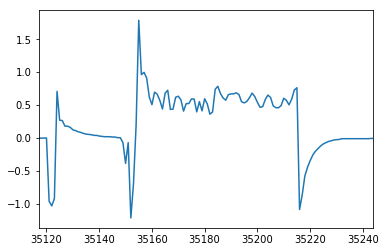

In [232]:
(data1.loc[data1.pltid== 2016092300590000]['PRC.GlobVar.PrcLocRtData.Prc1PosRef'] - data1.loc[data1.pltid== 2016092300590000]['PRC.GlobVar.PrcLocRtData.PrcPosActDs1']).plot()
plt.show()

In [ ]:
data1.c

In [35]:
l = pd.read_csv('../relevant/dataset120517.csv', sep=';') #

In [39]:
l.loc[(l.NOT_IN_25_0C==1)]['IS_FIRST'].sum()

21

In [40]:
len(l.loc[(l.NOT_IN_25_0C==1)])

236

In [26]:
l.loc[l.PIECE_ID.isin(data2.id2.unique().tolist())]['TMP_STP_ALL_AVG']

6911    475.129059
6915    496.750214
6917    479.629547
6919    478.438202
6921    476.793732
6923    493.180969
6925    487.764404
6927    475.777618
6929    489.849060
6931    482.663635
6933    485.315216
6935    492.404419
6937    483.831818
6939    487.197815
6941    487.839722
6943    477.425934
6945    477.239319
6947    480.206604
6949    488.076599
6951    486.461792
6953    485.050873
6955    478.660950
6957    501.625641
6959    495.113770
6961    483.789612
6963    487.458466
6965    483.500916
6967    473.941040
6969    474.986938
6971    482.573090
           ...    
9316    481.717621
9318    478.570648
9320    499.910431
9322    472.945435
9324    484.018463
9326    468.347748
9328    485.657745
9330    479.841919
9332    492.162537
9334    486.448425
9336    484.687561
9338    491.069397
9340    488.931244
9342    473.885284
9344    485.667206
9346    480.533508
9348    485.592529
9350    488.905182
9352    489.312775
9354    509.549438
9356    505.735931
9358    505.

In [105]:
float(len(data1.id1.unique()))

1870.0

In [104]:
l.loc[l.PIECE_ID.isin(data2.id2.unique().tolist())]['NOT_IN_40_0C'].sum()/float(len(data2.id2.unique()))

0.0035026269702276708

In [ ]:
l.loc[l.PIECE_ID.isin(data1.id1.unique().tolist())]['NOT_IN_40_0C'].sum()

In [32]:
l.NOT_IN_40_0C.value_counts()

0    9310
1      66
Name: NOT_IN_40_0C, dtype: int64

In [32]:
np.var(l.loc[l.PIECE_ID.isin(data1.id1.unique().tolist())]['PLT_COOL_SPD_TAIL_AVG'])

0.004421320894656489

In [6]:
#sort by time
# dist btw lists
#время охлаждения
df = pd.concat([data1, data2],ignore_index=1)